[https://github.com/aallen5636/Module-6-Assignment-1----Web-Scraping-and-NLP-with-Requests-BeautifulSoup-and-spaCy-No-GHCR](https://github.com/aallen5636/Module-6-Assignment-1----Web-Scraping-and-NLP-with-Requests-BeautifulSoup-and-spaCy-No-GHCR)

Web Mining and Applied NLP (44-620)

Web Scraping and NLP with Requests, BeautifulSoup, and spaCy

Student Name: Ashley Allen

1. Write code that extracts the article html from https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/ and dumps it to a .pkl (or other appropriate file)

In [25]:
import requests

response = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')

print(response.status_code)
print(response.headers['content-type'])
# Uncomment next line to print the full HTML text;  it's long so when done, recomment
# print(response.text)

200
text/html; charset=UTF-8


In [26]:
from bs4 import BeautifulSoup

# parser = 'html5lib'
parser = 'html.parser'

soup = BeautifulSoup(response.text, parser)
# Uncomment next lines to explore full page contents; it's long so when done, recomment
# print(soup)
# print(soup.prettify())

In [27]:
for header in soup.findAll('h1'):
    print('h1 header:', header)
    print('h1 text:', header.text)

h1 header: <h1 class="site-title">
<a href="https://web.archive.org/web/20210327165005/https://hackaday.com/" rel="home">Hackaday</a>
</h1>
h1 text: 
Hackaday

h1 header: <h1 class="entry-title" itemprop="name">How Laser Headlights Work</h1>
h1 text: How Laser Headlights Work
h1 header: <h1 class="screen-reader-text">Post navigation</h1>
h1 text: Post navigation
h1 header: <h1 class="widget-title">Search</h1>
h1 text: Search
h1 header: <h1 class="widget-title">Never miss a hack</h1>
h1 text: Never miss a hack
h1 header: <h1 class="widget-title">Subscribe</h1>
h1 text: Subscribe
h1 header: <h1 class="widget-title">If you missed it</h1>
h1 text: If you missed it
h1 header: <h1 class="widget-title">Our Columns</h1>
h1 text: Our Columns
h1 header: <h1 class="widget-title">Search</h1>
h1 text: Search
h1 header: <h1 class="widget-title">Never miss a hack</h1>
h1 text: Never miss a hack
h1 header: <h1 class="widget-title">Subscribe</h1>
h1 text: Subscribe
h1 header: <h1 class="widget-title">I

In [28]:
parser = 'html.parser'

In [29]:
article_page = requests.get('https://web.archive.org/web/20210327165005/https://hackaday.com/2021/03/22/how-laser-headlights-work/')
article_html = article_page.text

# pickle works similar to json, but stores information in a binary format
# json files are readable by humans, pickle files, not so much

# BeautifulSoup objects don't pickle well, so it's appropriate and polite to web developers to cache the text of the web page, or just dump it to an html file you can read in later as a regular file
import pickle
with open('python-match.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

In [30]:
with open('python-match.pkl', 'rb') as f:
    article_html = pickle.load(f)

In [31]:
soup = BeautifulSoup(article_html, parser)

In [32]:
article_element = soup.find('article')
# Uncomment to see the entire article element html; again, it's long
# print(article_element)

2. Read in your article's html source from the file you created in question 1 and print it's text (use .get_text())

In [33]:
print(article_element.get_text())



How Laser Headlights Work


                130 Comments            

by:
Lewin Day



March 22, 2021








When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind. Engines, fuel efficiency, and the switch to electric power are all more front of mind. However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs. Now, a new technology is on the scene, with lasers!

Laser Headlights?!
BWM’s prototype laser headlight assemblies undergoing testing.
The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile. Obviously, coherent beams of monochromatic light would make for poor illumination outside o

3.Load the article text into a trained spaCy pipeline, and determine the 5 most frequent tokens (converted to lower case). Print the common tokens with an appropriate label. Additionally, print the tokens their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [34]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
# why not, let's add some fun sentiment analysis, because we can
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())
print(f'Polarity: {doc._.polarity}')

Polarity: 0.1325758769416858


In [35]:
for lexeme in doc[:5]:
    print('---',lexeme)

--- 


--- How
--- Laser
--- Headlights
--- Work


In [36]:
non_ws_tokens = []
for token in doc:
    if not token.is_space:
        non_ws_tokens.append(token)
print(non_ws_tokens)

[How, Laser, Headlights, Work, 130, Comments, by, :, Lewin, Day, March, 22, ,, 2021, When, we, think, about, the, onward, march, of, automotive, technology, ,, headlights, are, n’t, usually, the, first, thing, that, come, to, mind, ., Engines, ,, fuel, efficiency, ,, and, the, switch, to, electric, power, are, all, more, front, of, mind, ., However, ,, that, does, n’t, mean, there, are, n’t, thousands, of, engineers, around, the, world, working, to, improve, the, state, of, the, art, in, automotive, lighting, day, in, ,, day, out, ., Sealed, beam, headlights, gave, way, to, more, modern, designs, once, regulations, loosened, up, ,, while, bulbs, moved, from, simple, halogens, to, xenon, HIDs, and, ,, more, recently, ,, LEDs, ., Now, ,, a, new, technology, is, on, the, scene, ,, with, lasers, !, Laser, Headlights, ?, !, BWM, ’s, prototype, laser, headlight, assemblies, undergoing, testing, ., The, first, image, brought, to, mind, by, the, phrase, “, laser, headlights, ”, is, that, of, l

In [37]:
def we_care_about(token):
    return not (token.is_space or token.is_punct)

interesting_tokens = [token for token in doc if we_care_about(token)]
print(interesting_tokens)

[How, Laser, Headlights, Work, 130, Comments, by, Lewin, Day, March, 22, 2021, When, we, think, about, the, onward, march, of, automotive, technology, headlights, are, n’t, usually, the, first, thing, that, come, to, mind, Engines, fuel, efficiency, and, the, switch, to, electric, power, are, all, more, front, of, mind, However, that, does, n’t, mean, there, are, n’t, thousands, of, engineers, around, the, world, working, to, improve, the, state, of, the, art, in, automotive, lighting, day, in, day, out, Sealed, beam, headlights, gave, way, to, more, modern, designs, once, regulations, loosened, up, while, bulbs, moved, from, simple, halogens, to, xenon, HIDs, and, more, recently, LEDs, Now, a, new, technology, is, on, the, scene, with, lasers, Laser, Headlights, BWM, ’s, prototype, laser, headlight, assemblies, undergoing, testing, The, first, image, brought, to, mind, by, the, phrase, laser, headlights, is, that, of, laser, beams, firing, out, the, front, of, an, automobile, Obviousl

In [38]:
from collections import Counter
word_freq = Counter(map(str,interesting_tokens))
print(word_freq.most_common(5))

[('the', 68), ('to', 37), ('of', 36), ('laser', 29), ('in', 24)]


In [39]:
def we_care_about(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token for token in doc if we_care_about(token)]
word_freq = Counter(map(str,interesting_tokens))
print(word_freq.most_common(5))

[('laser', 29), ('headlights', 17), ('technology', 10), ('headlight', 10), ('LED', 10)]


4. Load the article text into a trained spaCy pipeline, and determine the 5 most frequent lemmas (converted to lower case). Print the common lemmas with an appropriate label. Additionally, print the lemmas with their frequencies (with appropriate labels). Make sure to remove things we don't care about (punctuation, stopwords, whitespace).

In [40]:
interesting_lemmas = [token.lemma_.lower() for token in doc if we_care_about(token)]
lemma_freq = Counter(interesting_lemmas)
print(lemma_freq.most_common(5))

[('laser', 40), ('headlight', 28), ('beam', 12), ('led', 11), ('technology', 10)]


5. Define the following methods:
score_sentence_by_token(sentence, interesting_token) that takes a sentence and a list of interesting token and returns the number of times that any of the interesting words appear in the sentence divided by the number of words in the sentence
score_sentence_by_lemma(sentence, interesting_lemmas) that takes a sentence and a list of interesting lemmas and returns the number of times that any of the interesting lemmas appear in the sentence divided by the number of words in the sentence
You may find some of the code from the in class notes useful; feel free to use methods (rewrite them in this cell as well). Test them by showing the score of the first sentence in your article using the frequent tokens and frequent lemmas identified in question 3.

In [41]:
sentences = list(doc.sents) # Thanks spaCy for just giving us our sentences
for sentence in sentences:
    count = 0
    for token in sentence:
        if token.lemma_.lower() in interesting_lemmas:
            count += 1
    # because there's a bunch of junk newlines, we'll replace those with nothing, as well as a little bit of whitespace
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    print(count,':', sent_str)

10 : How Laser Headlights Work        130 Comments      by:Lewin DayMarch 22, 2021
10 : When we think about the onward march of automotive technology, headlights aren’t usually the first thing that come to mind.
7 : Engines, fuel efficiency, and the switch to electric power are all more front of mind.
12 : However, that doesn’t mean there aren’t thousands of engineers around the world working to improve the state of the art in automotive lighting day in, day out.
17 : Sealed beam headlights gave way to more modern designs once regulations loosened up, while bulbs moved from simple halogens to xenon HIDs and, more recently, LEDs.
4 : Now, a new technology is on the scene, with lasers!
2 : Laser Headlights?!
7 : BWM’s prototype laser headlight assemblies undergoing testing.
10 : The first image brought to mind by the phrase “laser headlights” is that of laser beams firing out the front of an automobile.
13 : Obviously, coherent beams of monochromatic light would make for poor illuminatio

6. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

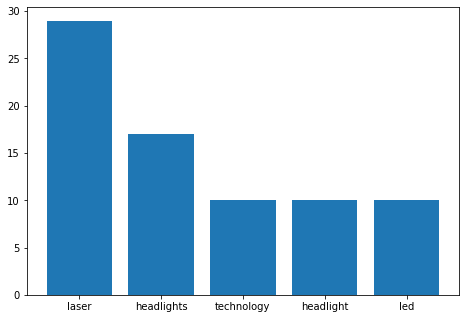

In [42]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
top_tokens = ['laser', 'headlights', 'technology', 'headlight', 'led']
scores = [29,17,10,10,10]
ax.bar(top_tokens,scores)
plt.show() #The most common range of scores seems to be 10. 

7. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

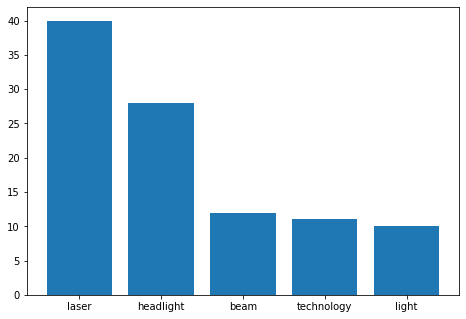

In [43]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
top_lemmas = ['laser', 'headlight', 'beam', 'technology', 'light']
scores = [40,28,12,11,10]
ax.bar(top_lemmas,scores)
plt.show() #The most common range of scores seems to be 10. 

8. Which tokens and lexems would be ommitted from the lists generated in questions 3 and 4 if we only wanted to consider nouns as interesting words? How might we change the code to only consider nouns? Put your answer in this Markdown cell (you can edit it by double clicking it).

for token in sentence:
    
    if token.pos_=="NOUN":
       
       nouns.append(token)
        
 print (nouns)